### Conteúdos:
- Importações das bases e bibliotecas utilizadas.
- Análises das características das bases.
- Busca por informações valiosas relacionadas aos produtos.
- Análises temporais com diferentes variáveis.
- Análises das perdas dos produtos.
- Comparações dos períodos, com base em determinados requisitos.

Link dos arquivos: https://www.kaggle.com/datasets/yapwh1208/supermarket-sales-data

# **Importações:**


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib,
    "Sklearn":sklearn}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.7.1
Numpy                |     1.24.3
Pandas               |      1.5.3
Seaborn              |     0.12.2
Sklearn              |      1.3.2


In [65]:
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler

b1 = pd.read_csv('annex1.csv')
b2 = pd.read_csv('annex2.csv')
b3 = pd.read_csv('annex3.csv')
b4 = pd.read_csv('annex4.csv')

In [66]:
b1.head(3)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables


In [67]:
b2.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No


In [68]:
b3.head(3)

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19


In [69]:
b4.head(3)

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80


# **Analisando as bases:**

**Temos 4 bases:**
- 1. Com o código e nome do item, e código e nome da categoria
- 2. Com a data e hora da compra, código, quantidade, preço do quilo, se foi vendido ou devolvido, e se teve desconto
- 3. Com a data, código do item e preço por atacado
- 4. Código e nome do item e percentual de perda

### **Base de dados dos vegetais:**

In [70]:
b1.head(3)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables


In [71]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [72]:
b1.describe()

,Item Code,Category Code
count,2.510000e+02,2.510000e+02
mean,1.031908e+14,1.011010e+09
std,1.048400e+12,2.915469e+02
min,1.029000e+14,1.011010e+09
25%,1.029000e+14,1.011010e+09
50%,1.029000e+14,1.011011e+09
75%,1.029000e+14,1.011011e+09
max,1.069740e+14,1.011011e+09


In [73]:
print('Valores duplicados: ', b1.duplicated().sum())
print('')
print('Valores nulos:')
print(b1.isnull().sum())

Valores duplicados:  0

Valores nulos:
Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64


### **Base de registros diários de vendas**

In [74]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


In [75]:
b2.describe()

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
count,8.785030e+05,878503.000000,878503.000000
mean,1.030313e+14,0.536112,8.917144
std,7.174368e+11,0.400087,6.311265
min,1.029000e+14,-9.082000,0.100000
25%,1.029000e+14,0.290000,4.900000
50%,1.029000e+14,0.435000,7.900000
75%,1.029000e+14,0.742000,10.800000
max,1.069740e+14,160.000000,119.900000


In [76]:
print('Valores duplicados: ', b2.duplicated().sum())
print('')
print('Valores nulos:')
print(b2.isnull().sum())

Valores duplicados:  0

Valores nulos:
Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64


### **Código do item e preço por quilo**

In [77]:
b3.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [78]:
b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [79]:
b3.describe()

,Item Code,Wholesale Price (RMB/kg)
count,5.598200e+04,55982.000000
mean,1.030449e+14,5.962620
std,7.527927e+11,5.067802
min,1.029000e+14,0.010000
25%,1.029000e+14,2.810000
50%,1.029000e+14,4.630000
75%,1.029000e+14,7.570000
max,1.069740e+14,141.000000


In [80]:
b3.nunique()

Date                        1091
Item Code                    251
Wholesale Price (RMB/kg)    2380
dtype: int64

In [81]:
print('Valores duplicados: ', b3.duplicated().sum())
print('')
print('Valores nulos:')
print(b3.isnull().sum())

Valores duplicados:  0

Valores nulos:
Date                        0
Item Code                   0
Wholesale Price (RMB/kg)    0
dtype: int64


### **Taxa de perda por produto**

In [82]:
b4.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [83]:
b4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [84]:
b4.describe()

,Item Code,Loss Rate (%)
count,2.510000e+02,251.000000
mean,1.031908e+14,9.426693
std,1.048400e+12,5.211027
min,1.029000e+14,0.000000
25%,1.029000e+14,8.225000
50%,1.029000e+14,9.430000
75%,1.029000e+14,11.130000
max,1.069740e+14,29.250000


In [85]:
b4.nunique()

Item Code        251
Item Name        247
Loss Rate (%)    126
dtype: int64

In [86]:
print('Valores duplicados: ', b4.duplicated().sum())
print('')
print('Valores nulos:')
print(b4.isnull().sum())

Valores duplicados:  0

Valores nulos:
Item Code        0
Item Name        0
Loss Rate (%)    0
dtype: int64


# **Explorando as bases:**

In [87]:
b2.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No


- **Alterando o tipo da coluna data. De object para date**
- **Criando função para aplicar o dia da semana, através do número dado pelo dt.weekday**

In [88]:
b2['Date'] = pd.to_datetime(b2.Date, format='%Y-%m-%d')
b2['Dia da semana'] = b2.Date.dt.weekday
def dia_sem(x):
    if x == 0:
        return 'Segunda'
    elif x == 1:
        return 'Terça'
    elif x == 2:
        return 'Quarta'
    elif x == 3:
        return 'Quinta'
    elif x == 4:
        return 'Sexta'
    elif x == 5:
        return 'Sábado'
    elif x == 6:
        return 'Domingo'
    
b2['Dia da semana'] = b2['Dia da semana'].apply(dia_sem)

**Aplicando função lambda em duas colunas, retornando 0 e 1**

In [89]:
b2['Sale or Return'] = b2['Sale or Return'].apply(lambda x:1 if x == 'sale' else 0) 
b2['Discount (Yes/No)'] = b2['Discount (Yes/No)'].apply(lambda x:1 if x == 'Yes' else 0)

In [90]:
# Visualizando resultados
b2.head(3)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia da semana
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,1,0,Quarta
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,1,0,Quarta
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,1,0,Quarta


**Criando novas colunas com: dia, mês, ano e período mês-ano**

In [91]:
b2['Day'] = b2.Date.dt.day
b2['Month'] = b2.Date.dt.month
b2['Year'] = b2.Date.dt.year
b2['Month_Year'] = b2.Date.dt.to_period('M')
b2 = b2.drop('Date',axis=1)

In [92]:
# Visualizando os resultados
b2.head(3)

,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia da semana,Day,Month,Year,Month_Year
0,09:15:07.924,102900005117056,0.396,7.6,1,0,Quarta,1,7,2020,2020-07
1,09:17:27.295,102900005115960,0.849,3.2,1,0,Quarta,1,7,2020,2020-07
2,09:17:33.905,102900005117056,0.409,7.6,1,0,Quarta,1,7,2020,2020-07


- **Convertendo a coluna "Time" para tipo datetime**
- **Criando coluna com os horários (hora-minuto) das compras**
- **Criando coluna da hora das compras, ex: 9**

In [93]:
b2.Time = pd.to_datetime(b2.Time)
b2['Horário'] = b2['Time'].dt.strftime('%H:%M')
b2['Hora'] = b2['Time'].dt.hour
b2 = b2.drop('Time',axis=1)

In [94]:
# Visualizando os resultados.
b2.head(3)

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia da semana,Day,Month,Year,Month_Year,Horário,Hora
0,102900005117056,0.396,7.6,1,0,Quarta,1,7,2020,2020-07,09:15,9
1,102900005115960,0.849,3.2,1,0,Quarta,1,7,2020,2020-07,09:17,9
2,102900005117056,0.409,7.6,1,0,Quarta,1,7,2020,2020-07,09:17,9


**Criando função que retorna a parte do dia na qual a compra foi realizada**
- Madrugada-Manhã-Tarde-Noite

In [95]:
def parte_do_dia(x):
    if x >= 0 and x <6:
        return 'Madrugada'
    elif x >= 6 and x <12:
        return 'Manhã'
    elif x >= 12 and x < 18:
        return 'Tarde'
    elif x >= 18 and x < 24:
        return 'Noite'

In [96]:
#  Criando uma nova coluna e aplicando a função criada acima
b2['Parte do dia'] = b2['Hora'].apply(parte_do_dia)
b2.head(3)

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia da semana,Day,Month,Year,Month_Year,Horário,Hora,Parte do dia
0,102900005117056,0.396,7.6,1,0,Quarta,1,7,2020,2020-07,09:15,9,Manhã
1,102900005115960,0.849,3.2,1,0,Quarta,1,7,2020,2020-07,09:17,9,Manhã
2,102900005117056,0.409,7.6,1,0,Quarta,1,7,2020,2020-07,09:17,9,Manhã


### **Colocando a categoria do alimento na base "b2", para que possamos ver em que periodos determinadas categorias mais vendem**

In [97]:
b1.head(3)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables


In [98]:
b2.head(3)

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia da semana,Day,Month,Year,Month_Year,Horário,Hora,Parte do dia
0,102900005117056,0.396,7.6,1,0,Quarta,1,7,2020,2020-07,09:15,9,Manhã
1,102900005115960,0.849,3.2,1,0,Quarta,1,7,2020,2020-07,09:17,9,Manhã
2,102900005117056,0.409,7.6,1,0,Quarta,1,7,2020,2020-07,09:17,9,Manhã


In [99]:
b1_1 = b1[['Item Code','Category Name']]
b1_1.head(3)

,Item Code,Category Name
0,102900005115168,Flower/Leaf Vegetables
1,102900005115199,Flower/Leaf Vegetables
2,102900005115625,Flower/Leaf Vegetables


In [100]:
b2 = pd.merge(b2, b1_1, on='Item Code', how='left')
b2.head()

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia da semana,Day,Month,Year,Month_Year,Horário,Hora,Parte do dia,Category Name
0,102900005117056,0.396,7.6,1,0,Quarta,1,7,2020,2020-07,09:15,9,Manhã,Capsicum
1,102900005115960,0.849,3.2,1,0,Quarta,1,7,2020,2020-07,09:17,9,Manhã,Flower/Leaf Vegetables
2,102900005117056,0.409,7.6,1,0,Quarta,1,7,2020,2020-07,09:17,9,Manhã,Capsicum
3,102900005115823,0.421,10.0,1,0,Quarta,1,7,2020,2020-07,09:19,9,Manhã,Flower/Leaf Vegetables
4,102900005115908,0.539,8.0,1,0,Quarta,1,7,2020,2020-07,09:20,9,Manhã,Flower/Leaf Vegetables


In [101]:
dados_vendas_categorias_meses = b2.groupby('Month')['Category Name'].value_counts()
dados_vendas_categorias_meses

Month  Category Name              
1      Flower/Leaf Vegetables         26165
       Capsicum                       21274
       Edible Mushroom                17500
       Cabbage                         8006
       Aquatic Tuberous Vegetables     7416
                                      ...  
12     Edible Mushroom                15994
       Capsicum                       12826
       Aquatic Tuberous Vegetables     6620
       Cabbage                         6567
       Solanum                         1869
Name: Category Name, Length: 72, dtype: int64

In [102]:
c1_1 = b2.loc[(b2['Category Name'] == 'Aquatic Tuberous Vegetables') & (b2['Month'] <= 6)]
c2_1 = b2.loc[(b2['Category Name'] == 'Cabbage') & (b2['Month'] <= 6)]
c3_1 = b2.loc[(b2['Category Name'] == 'Capsicum') & (b2['Month'] <= 6)]
c4_1 = b2.loc[(b2['Category Name'] == 'Edible Mushroom') & (b2['Month'] <= 6)]
c5_1 = b2.loc[(b2['Category Name'].str.contains('Flower/Leaf')) & (b2['Month'] <= 6)]
c6_1 = b2.loc[(b2['Category Name'] == 'Solanum') & (b2['Month'] <= 6)]

c1_2 = b2.loc[(b2['Category Name'] == 'Aquatic Tuberous Vegetables') & (b2['Month'] > 6)]
c2_2 = b2.loc[(b2['Category Name'] == 'Cabbage') & (b2['Month'] > 6)]
c3_2 = b2.loc[(b2['Category Name'] == 'Capsicum') & (b2['Month'] > 6)]
c4_2 = b2.loc[(b2['Category Name'] == 'Edible Mushroom') & (b2['Month'] > 6)]
c5_2 = b2.loc[(b2['Category Name'].str.contains('Flower/Leaf')) & (b2['Month'] > 6)]
c6_2 = b2.loc[(b2['Category Name'] == 'Solanum') & (b2['Month'] > 6)]

a1_1 = c1_1['Month'].value_counts().sort_index()
a2_1 = c2_1['Month'].value_counts().sort_index()
a3_1 = c3_1['Month'].value_counts().sort_index()
a4_1 = c4_1['Month'].value_counts().sort_index()
a5_1 = c5_1['Month'].value_counts().sort_index()
a6_1 = c6_1['Month'].value_counts().sort_index()

a1_2 = c1_2['Month'].value_counts().sort_index()
a2_2 = c2_2['Month'].value_counts().sort_index()
a3_2 = c3_2['Month'].value_counts().sort_index()
a4_2 = c4_2['Month'].value_counts().sort_index()
a5_2 = c5_2['Month'].value_counts().sort_index()
a6_2 = c6_2['Month'].value_counts().sort_index()

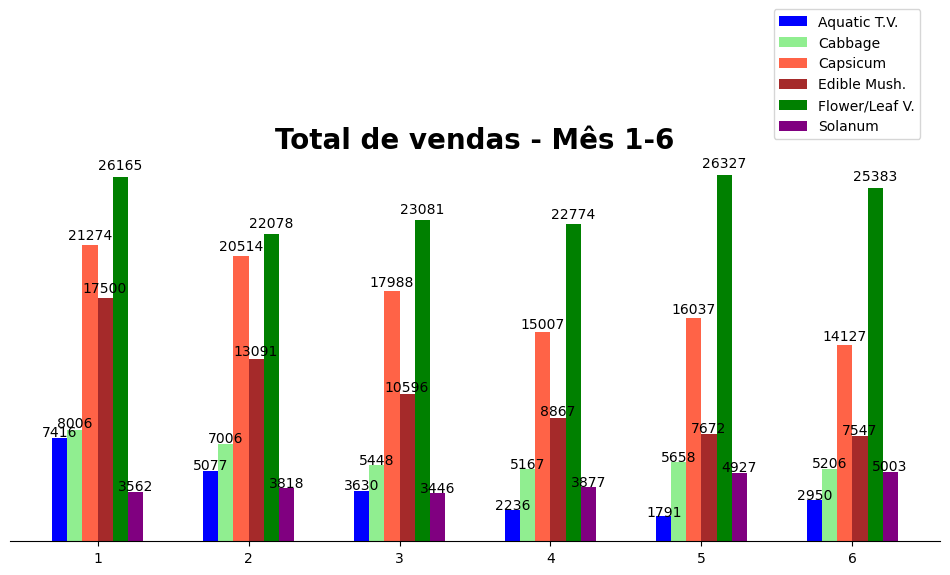

In [103]:
fig, ax = plt.subplots(figsize=(12,5))
w = 0.1

ax.bar(a1_1.index-0.25, a1_1.values, color='blue', width=w, label='Aquatic T.V.') # Aquático
ax.bar(a2_1.index-0.15, a2_1.values, color='lightgreen', width=w, label='Cabbage') # Repolho
ax.bar(a3_1.index-0.05, a3_1.values, color='tomato', width=w, label='Capsicum')  # Pimentão
ax.bar(a4_1.index+0.05, a4_1.values, color='brown', width=w, label='Edible Mush.') # Cogumelo comestivel
ax.bar(a5_1.index+0.15, a5_1.values, color='green', width=w, label='Flower/Leaf V.') # Flor/Legumes de Folha
ax.bar(a6_1.index+0.25, a6_1.values, color='purple', width=w, label='Solanum') # Plantas
ax.legend()
ax.legend(loc='upper center',bbox_to_anchor=(0.9, 1.4))
ax.yaxis.set_visible(False)
ax.spines[['left','top','right']].set_visible(False)
ax.set_xticks(np.arange(1,7))
ax.set_title('Total de vendas - Mês 1-6',fontsize=20,fontweight='bold')

for i in np.arange(0,6):
    ax.annotate(round(a1_1.values[i],0), (a1_1.index[i]-0.25, a1_1.values[i]+a1_1.values[i]*0.02), ha='center')
    ax.annotate(round(a2_1.values[i],0), (a2_1.index[i]-0.15, a2_1.values[i]+a2_1.values[i]*0.02), ha='center')
    ax.annotate(round(a3_1.values[i],0), (a3_1.index[i]-0.05, a3_1.values[i]+a3_1.values[i]*0.02), ha='center')
    ax.annotate(round(a4_1.values[i],0), (a4_1.index[i]+0.05, a4_1.values[i]+a4_1.values[i]*0.02), ha='center')
    ax.annotate(round(a5_1.values[i],0), (a5_1.index[i]+0.15, a5_1.values[i]+a5_1.values[i]*0.02), ha='center')
    ax.annotate(round(a6_1.values[i],0), (a6_1.index[i]+0.25, a6_1.values[i]+a6_1.values[i]*0.02), ha='center')
plt.show()

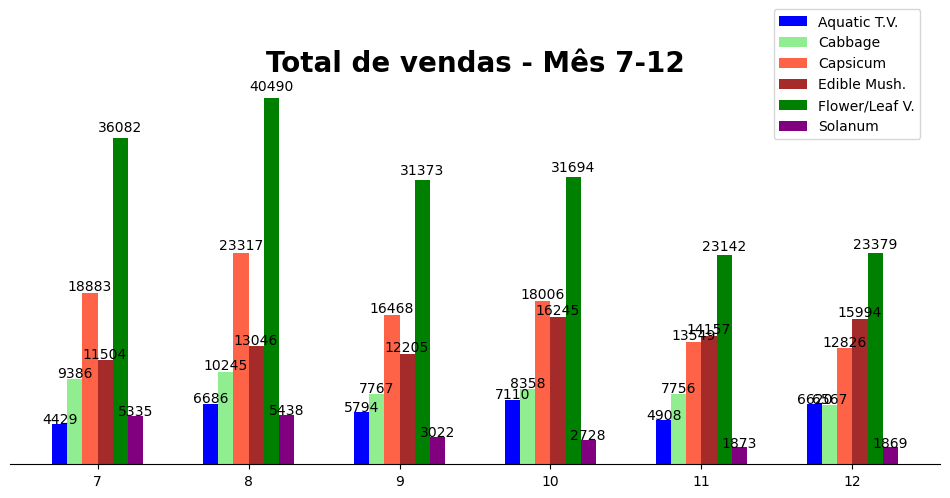

In [104]:
fig, ax = plt.subplots(figsize=(12,5))
w = 0.1

ax.bar(a1_2.index-0.25, a1_2.values, color='blue', width=w, label='Aquatic T.V.') # Aquático
ax.bar(a2_2.index-0.15, a2_2.values, color='lightgreen', width=w, label='Cabbage') # Repolho
ax.bar(a3_2.index-0.05, a3_2.values, color='tomato', width=w, label='Capsicum')  # Pimentão
ax.bar(a4_2.index+0.05, a4_2.values, color='brown', width=w, label='Edible Mush.') # Cogumelo comestivel
ax.bar(a5_2.index+0.15, a5_2.values, color='green', width=w, label='Flower/Leaf V.') # Flor/Legumes de Folha
ax.bar(a6_2.index+0.25, a6_2.values, color='purple', width=w, label='Solanum') # Plantas
ax.legend()
ax.legend(loc='upper center',bbox_to_anchor=(0.9, 1.2))
ax.yaxis.set_visible(False)
ax.spines[['left','top','right']].set_visible(False)
ax.set_xticks(np.arange(7,13))
ax.set_title('Total de vendas - Mês 7-12',fontsize=20,fontweight='bold')

for i in np.arange(0,6):
    ax.annotate(round(a1_2.values[i],0), (a1_2.index[i]-0.25, a1_2.values[i]+a1_2.values[i]*0.02), ha='center')
    ax.annotate(round(a2_2.values[i],0), (a2_2.index[i]-0.15, a2_2.values[i]+a2_2.values[i]*0.02), ha='center')
    ax.annotate(round(a3_2.values[i],0), (a3_2.index[i]-0.05, a3_2.values[i]+a3_2.values[i]*0.02), ha='center')
    ax.annotate(round(a4_2.values[i],0), (a4_2.index[i]+0.05, a4_2.values[i]+a4_2.values[i]*0.02), ha='center')
    ax.annotate(round(a5_2.values[i],0), (a5_2.index[i]+0.15, a5_2.values[i]+a5_2.values[i]*0.02), ha='center')
    ax.annotate(round(a6_2.values[i],0), (a6_2.index[i]+0.25, a6_2.values[i]+a6_2.values[i]*0.02), ha='center')
plt.show()

# **1. Análises temporais**
- Foram geradas muitas informações influentes com os códigos acima.

### **Quantidade de vendas por horário**

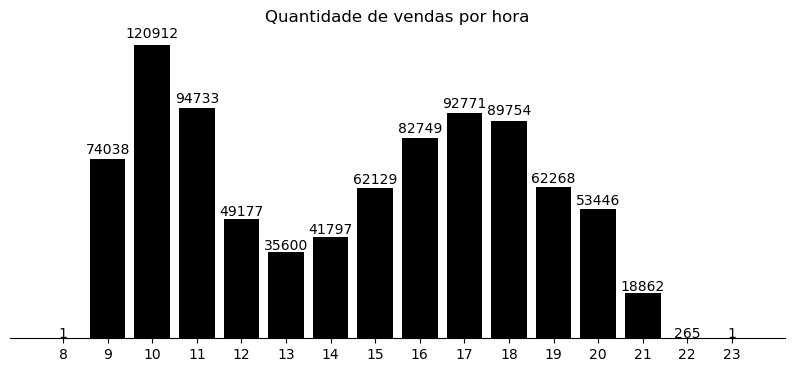

In [105]:
a = b2.Hora.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(a.index, a.values, color='black')
ax.set_title('Quantidade de vendas por hora')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center')
ax.set_xticks(a.index)
plt.show()

Acima temos o total de compras realizadas, agrupadas pela hora.

Analisando o gráfico acima notamos que há um pico de vendas as 10h, que vai caindo até as 13h. As 14h volta a tendência de crescimento, atingindo pico as 17h.

### **Partes do dia**

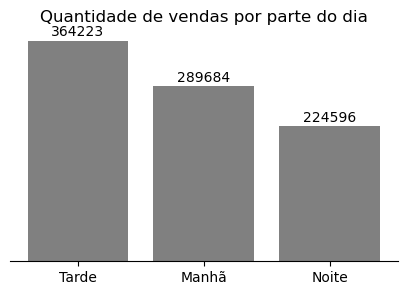

In [106]:
a = b2['Parte do dia'].value_counts()
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(a.index, a.values, color='gray')
ax.set_title('Quantidade de vendas por parte do dia')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center')
ax.set_xticks(a.index)
plt.show()

Acima o gráfico mostra a quantidade de vendas por parte do dia. A liderança fica com o período da tarde.

### **Número de vendas por período mês-ano**

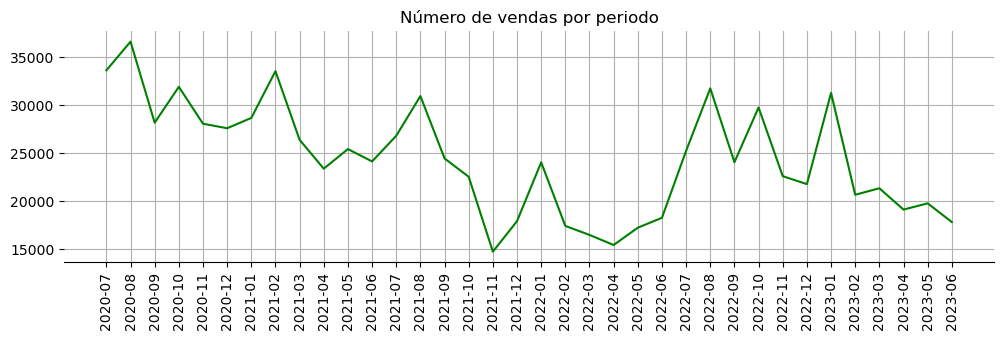

In [107]:
base_data = b2.set_index('Month_Year')
a = base_data.index.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(a.index.astype('str'), a.values, color='green')
ax.set_title('Número de vendas por periodo')
ax.spines[['top','left','right']].set_visible(False)
ax.grid()
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

Acima vemos uma série temporal, onde é pego o período de 2020-07 até 2023-06.

Conseguimos ver que: 
- Em períodos do mês de agosto as vendas costumam subir consideravelmente.
- Períodos a partir do mês de fevereiro surge uma tendência de queda até o final de abril


### **Número de vendas agrupadas pelos meses**

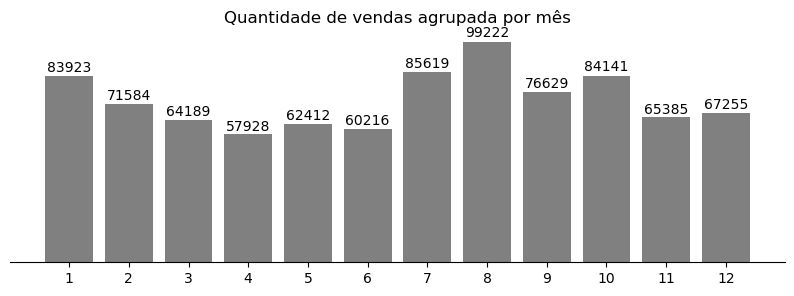

In [108]:
a = b2.Month.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,3))
ax.bar(a.index, a.values, color='gray')
ax.set_title('Quantidade de vendas agrupada por mês')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center')
ax.set_xticks(a.index)
plt.show()

- O mês de agosto aparece no topo com 99222 vendas.
- O mês de abril aparece por último com 57928 vendas.

Como estamos falando de vendas de verduras, e notamos essa grande diferença, surgem algumas possíveis ideias para as causas dessas discrêpancias nos valores de vendas:
- Isso pode ocorrer devido a épocas do ano com melhores safras, resultantes de fatores ambientais

### **Número de vendas agrupadas pelos dias da semana**

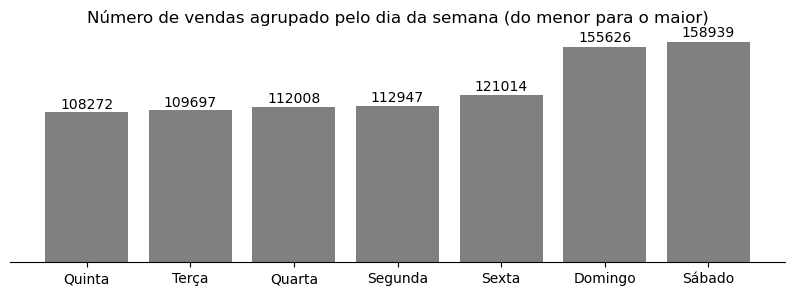

In [109]:
a = b2['Dia da semana'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,3))
ax.bar(a.index, a.values, color='gray')
ax.set_title('Número de vendas agrupado pelo dia da semana (do menor para o maior)')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center')
ax.set_xticks(a.index)
plt.show()

Como podemos ver acima, em dias de fim de semana os números de vendas foram maiores quando comparados a dias úteis.

Fator que pode ser levado em consideração pela equipe, com relação a criação de promoções, ofertas, planejamentos...

### **Visualizando quantidade de vendas com status:**
- **Com/Sem desconto**
- **Vendido/Devolvido**

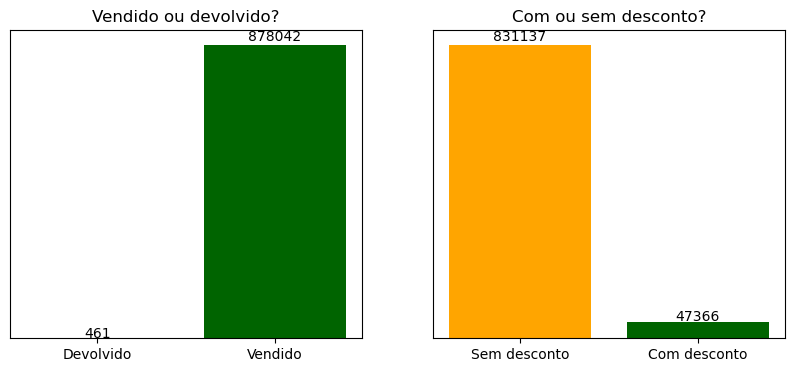

In [110]:
a = b2['Sale or Return'].value_counts().sort_index()
b = b2['Discount (Yes/No)'].value_counts().sort_index()

fig, ax = plt.subplots(ncols=2,figsize=(10,4))
ax[0].bar(a.index, a.values, color=['tomato','darkgreen'])
ax[0].set_title('Vendido ou devolvido?')
#ax[0].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax[0].annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.014),ha='center')
ax[0].set_xticks(a.index)
ax[0].set_xticklabels(['Devolvido','Vendido'])

ax[1].bar(b.index, b.values, color=['orange','darkgreen'])
ax[1].set_title('Com ou sem desconto?')
#ax[1].spines[['top','left','right']].set_visible(False)
ax[1].yaxis.set_visible(False)
for i in range(0,len(b.index)):
    ax[1].annotate(b.values[i],(b.index[i],b.values[i]+b.values[i]*0.014),ha='center')
ax[1].set_xticks(b.index)
ax[1].set_xticklabels(['Sem desconto','Com desconto'])

plt.show()

**Pequeno resumo das anaálises acima:**
- 5 Horários mais vendidos: 10h, 11h, 17h, 18h, 16h
- Parte do dia com mais vendas: Tarde
- O mês com mais vendas é agosto
- O mês com menos vendas é abril
- Os 3 períodos com mais vendas são: 2020-08, 2021-02, 2022-08
- Os 3 períodos com menos vendas são: 2021-11, 2022-04, 2022-02
- A tendência do ano de 2020 até o fim de 2021 foi de queda, se estabilizando nos ano seguinte


# **2. Taxa de perda dos produtos**


Uma coisa que devemos levar em conta é a taxa de perda dos vegetais, que em excesso traz prejuízos ao negócio. Portanto, é necessário analisar essa taxa e comparar com a demanda, para assim trabalhar corretamente em da reposição desses produtos.

In [111]:
prod_dev = b2.loc[b2['Sale or Return'] == 0, 'Item Code'].value_counts().head()
prod_dev

102900011016701    38
102900005116714    36
102900005116530    34
102900005116899    22
102900005118831    18
Name: Item Code, dtype: int64

In [112]:
# Visualizando a base:
b4.head(3)

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80


**Visualizando a taxa de perda**

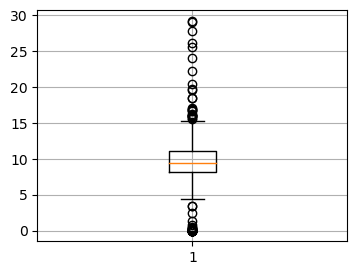

In [113]:
fig, ax = plt.subplots(figsize=(4,3))
ax.boxplot(b4['Loss Rate (%)'])
ax.grid()
plt.show()

Acima conseguimos ver aonde os valores estão centrados, e podemos notar que possuem alguns outliers.

**Visualizando alguns valores**

In [114]:
print('A média das taxas de perda é ', round(b4['Loss Rate (%)'].mean(),3))
print('A mediana das taxas de perda é ', b4['Loss Rate (%)'].median())
print('A menor das taxas de perda é ', b4['Loss Rate (%)'].min())
print('A maior taxas de perda é ', b4['Loss Rate (%)'].max())

A média das taxas de perda é  9.427
A mediana das taxas de perda é  9.43
A menor das taxas de perda é  0.0
A maior taxas de perda é  29.25


É interessante analisarmos as categorias com maiores percentuais de perda, além dos vegetais desses grupos. Afinal, podemos encontrar informações relevantes e influentes nas perdas.

**Criando função para agrupar o Loss Rate (taxa de perda)**

In [115]:
def perda_vegetais(x):
    if x >= 25:
        return '25%+'
    elif x >= 20:
        return '20%-25%'
    elif x >= 15:
        return '15%-20%'
    elif x >= 10:
        return '10%-15%'
    elif x >= 5:
        return '05%-10%'
    elif x >= 0:
        return '0%-5%'

In [116]:
# Aplicando a função
b4['Taxa_perda_grupo'] = b4['Loss Rate (%)'].apply(perda_vegetais)
b4.head(3)

,Item Code,Item Name,Loss Rate (%),Taxa_perda_grupo
0,102900005115168,Niushou Shengcai,4.39,0%-5%
1,102900005115199,Sichuan Red Cedar,10.46,10%-15%
2,102900005115250,Xixia Black Mushroom (1),10.80,10%-15%


### **Visualizando as taxas de perdas**

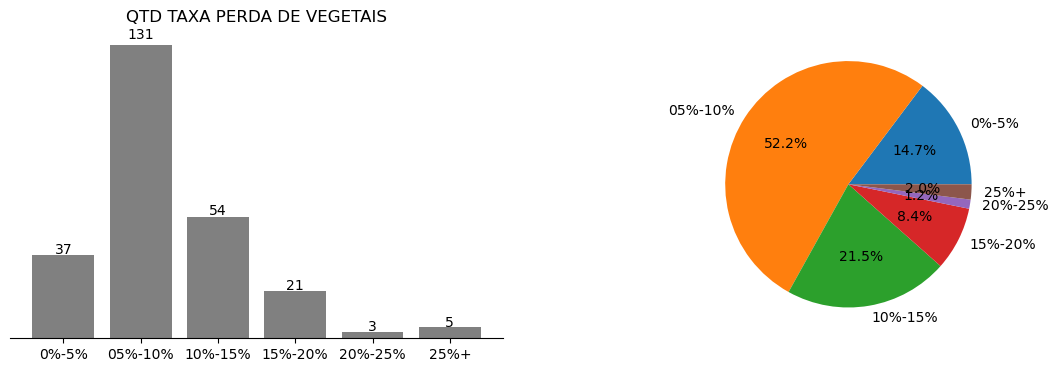

In [117]:
a = b4['Taxa_perda_grupo'].value_counts().sort_index()
fig, ax = plt.subplots(ncols=2,figsize=(14,4))
ax[0].bar(a.index, a.values, color='gray')
ax[0].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)
ax[0].set_title('QTD TAXA PERDA DE VEGETAIS', fontsize=12)
for i in range(0,len(a.index)):
    ax[0].annotate(a.values[i], (a.index[i], a.values[i]+a.values[i]*0.02),ha='center')
    
ax[1].pie(a.values, labels=a.index, autopct='%1.1f%%')
plt.show()

Analisando o gráfico acima, podemos ver que a grande maioria dos vegetais estão com os valores entre 05-10%, alguns com valores menores e também até 15%

Porém, devemos nos atentar a produtos com taxas superiores a 20%, pois a taxa ja começa a fugir da média e partir para um valor anormal (quando levado em conta a média)

Obs: Mais a frente, farei uma análise dos 21 produtos do grupo 15-20%

**Analisando os produtos com mais de 20% de perda**

In [118]:
b4.loc[b4['Loss Rate (%)'] >= 20]

,Item Code,Item Name,Loss Rate (%),Taxa_perda_grupo
17,102900005115960,Chinese Cabbage,22.27,20%-25%
43,102900005118824,High Melon (1),29.25,25%+
55,102900011000175,Kuaicai,20.38,20%-25%
59,102900011000632,Purple Cabbage (1),25.53,25%+
67,102900011006689,Dongmenkou Xiaobaicai,27.84,25%+
68,102900011006948,Foreign Garland Chrysanthemum,26.16,25%+
181,102900011033081,Chuncai,29.03,25%+
226,102900051000944,Honghu Lotus Root,24.05,20%-25%


### **Visualizando algumas informações a respeito desses produtos, como:**
- Nome
- Categoria
- Número de vendas
- Preço por atacado
- Taxa de perda 

In [119]:
# Pegando o código dos itens, aonde a taxa de perda é maior ou igual a 20.
codigo_atencao = b4.loc[b4['Loss Rate (%)'] >= 20, 'Item Code'].values
codigo_atencao

array([102900005115960, 102900005118824, 102900011000175, 102900011000632,
       102900011006689, 102900011006948, 102900011033081, 102900051000944],
      dtype=int64)

In [120]:
for i in codigo_atencao:
    
    base = b2.loc[b2['Item Code'] == i]
    a = b1.loc[b1['Item Code'] == i,'Item Name'].values[0]
    b = b1.loc[b1['Item Code'] == i,'Category Name'].values[0]
    
    print("Vegetal:",a)
    print("Categoria:",b)
    print("Quantidade vendida:",b2.loc[b2['Item Code'] == i,'Item Code'].value_counts().values[0])
    print('Preço por atacado: ', round(base['Unit Selling Price (RMB/kg)'].mean(),2))
    print('Taxa de perda: ',b4.loc[b4['Item Code'] == i,'Loss Rate (%)'].values[0])
    print(' ')

Vegetal: Chinese Cabbage
Categoria: Flower/Leaf Vegetables
Quantidade vendida: 15178
Preço por atacado:  2.15
Taxa de perda:  22.27
 
Vegetal: High Melon (1)
Categoria: Aquatic Tuberous Vegetables
Quantidade vendida: 3559
Preço por atacado:  13.74
Taxa de perda:  29.25
 
Vegetal: Kuaicai
Categoria: Flower/Leaf Vegetables
Quantidade vendida: 253
Preço por atacado:  8.22
Taxa de perda:  20.38
 
Vegetal: Purple Cabbage (1)
Categoria: Cabbage
Quantidade vendida: 24
Preço por atacado:  13.56
Taxa de perda:  25.53
 
Vegetal: Dongmenkou Xiaobaicai
Categoria: Flower/Leaf Vegetables
Quantidade vendida: 4162
Preço por atacado:  5.25
Taxa de perda:  27.84
 
Vegetal: Foreign Garland Chrysanthemum 
Categoria: Flower/Leaf Vegetables
Quantidade vendida: 1588
Preço por atacado:  16.15
Taxa de perda:  26.16
 
Vegetal: Chuncai
Categoria: Flower/Leaf Vegetables
Quantidade vendida: 40
Preço por atacado:  7.18
Taxa de perda:  29.03
 
Vegetal: Honghu Lotus Root
Categoria: Aquatic Tuberous Vegetables
Quantid

- Analisando alguns produtos, notamos que alguns possuem poucas vendas, além de uma alta taxa de perda. É de se pensar se devemos manter esse produto no estoque.
- Aos produtos que possuem muitas vendas, porém alta taxa de perda, devemos fazer um replanejamento na quantidade adquirida para o estoque, pois essa alta taxa traz prejuízo ao negócio.

### **Criando base com o nome do produto, categoria e taxa de perda**

In [121]:
b1_ = b1[['Item Code','Category Name']]
vegetais = pd.merge(b4,b1_, on='Item Code')
vegetais.head()

,Item Code,Item Name,Loss Rate (%),Taxa_perda_grupo,Category Name
0,102900005115168,Niushou Shengcai,4.39,0%-5%,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,10.46,10%-15%,Flower/Leaf Vegetables
2,102900005115250,Xixia Black Mushroom (1),10.80,10%-15%,Edible Mushroom
3,102900005115625,Local Xiaomao Cabbage,0.18,0%-5%,Flower/Leaf Vegetables
4,102900005115748,White Caitai,8.78,05%-10%,Flower/Leaf Vegetables


**Visualizando a quantidade de produtos por categoria**

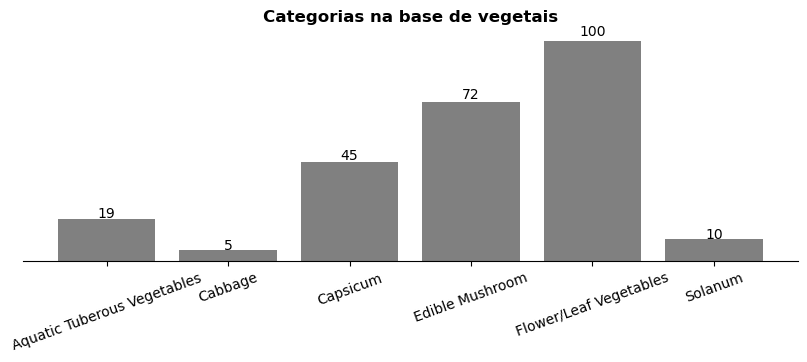

In [122]:
a = b1['Category Name'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,3))
ax.bar(a.index, a.values, color='gray')
ax.set_title('Categorias na base de vegetais', fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center')
ax.set_xticks(a.index)
ax.tick_params(axis='x', labelrotation = 20)
plt.show()

**Visualizando as taxas de perda por categoria**

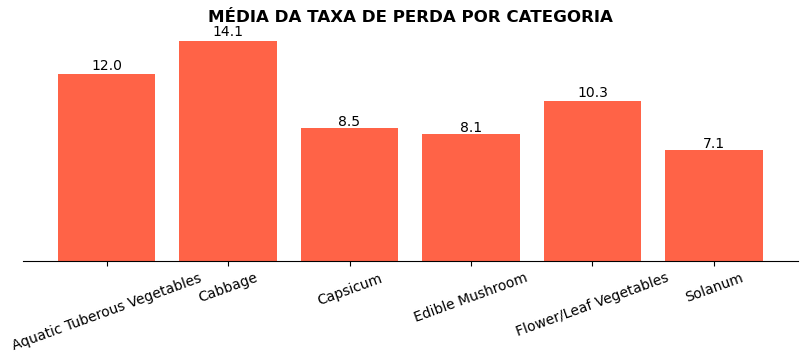

In [123]:
v = vegetais.groupby('Category Name')['Loss Rate (%)'].mean()
fig, ax = plt.subplots(figsize=(10,3))
ax.bar(v.index, v.values, color='tomato')
ax.set_title('MÉDIA DA TAXA DE PERDA POR CATEGORIA', fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(0,len(v.index)):
    ax.annotate(round(v.values[i],1),(v.index[i],v.values[i]+v.values[i]*0.025),ha='center')
ax.set_xticks(v.index)
ax.tick_params(axis='x', labelrotation = 20)
plt.show()

**Visualizando produtos mais/menos vendidos**

In [128]:
mais_vendidos = b2['Item Code'].value_counts().head(20).reset_index()
menos_vendidos = b2['Item Code'].value_counts().sort_values(ascending=True).head(20).reset_index()

In [129]:
mais_vendidos = pd.merge(mais_vendidos, b4, on='Item Code', how='left')
menos_vendidos = pd.merge(menos_vendidos, b4, on='Item Code', how='left')

In [130]:
mais_vendidos.head()

,index,Item Code,Item Name,Loss Rate (%),Taxa_perda_grupo
0,102900011016701,69945,NaN,NaN,NaN
1,102900005116714,58905,NaN,NaN,NaN
2,102900005116530,47509,NaN,NaN,NaN
3,102900005115779,39887,NaN,NaN,NaN
4,102900005116899,39285,NaN,NaN,NaN


In [131]:
menos_vendidos.head()

,index,Item Code,Item Name,Loss Rate (%),Taxa_perda_grupo
0,106973223300667,1,NaN,NaN,NaN
1,102900051000890,1,NaN,NaN,NaN
2,102900011031858,1,NaN,NaN,NaN
3,102900011009772,1,NaN,NaN,NaN
4,102900011023075,1,NaN,NaN,NaN


### **Analisando os produtos com mais de 15% de taxa de perda**

In [132]:
analise1 = b2[['Item Code','Quantity Sold (kilo)','Month']].copy()
analise1.head()

,Item Code,Quantity Sold (kilo),Month
0,102900005117056,0.396,7
1,102900005115960,0.849,7
2,102900005117056,0.409,7
3,102900005115823,0.421,7
4,102900005115908,0.539,7


In [133]:
analise = b4.loc[b4['Loss Rate (%)'] >= 15.00]
analise.head(3)

,Item Code,Item Name,Loss Rate (%),Taxa_perda_grupo
5,102900005115762,Amaranth,18.52,15%-20%
6,102900005115779,Yunnan Shengcai,15.25,15%-20%
17,102900005115960,Chinese Cabbage,22.27,20%-25%


In [134]:
codigos = analise['Item Code'].values
analise3 = analise1.loc[analise1['Item Code'].isin(codigos)]

In [135]:
janeiro = analise3.loc[analise3['Month'] == 1]
janeiro = pd.merge(janeiro, b4, on='Item Code', how='left')
janeiro1 = janeiro['Item Name'].value_counts().sort_index(ascending=True)

fevereiro = analise3.loc[analise3['Month'] == 2]
fevereiro = pd.merge(fevereiro, b4, on='Item Code', how='left')
fevereiro1 = fevereiro['Item Name'].value_counts().sort_index(ascending=True)

marco = analise3.loc[analise3['Month'] == 3]
marco = pd.merge(marco, b4, on='Item Code', how='left')
marco1 = marco['Item Name'].value_counts().sort_index(ascending=True)

abril = analise3.loc[analise3['Month'] == 4]
abril = pd.merge(abril, b4, on='Item Code', how='left')
abril1 = abril['Item Name'].value_counts().sort_index(ascending=True)

maio = analise3.loc[analise3['Month'] == 5]
maio = pd.merge(maio, b4, on='Item Code', how='left')
maio1 = maio['Item Name'].value_counts().sort_index(ascending=True)

junho = analise3.loc[analise3['Month'] == 6]
junho = pd.merge(junho, b4, on='Item Code', how='left')
junho1 = junho['Item Name'].value_counts().sort_index(ascending=True)

julho = analise3.loc[analise3['Month'] == 7]
julho = pd.merge(julho, b4, on='Item Code', how='left')
julho1 = julho['Item Name'].value_counts().sort_index(ascending=True)

agosto = analise3.loc[analise3['Month'] == 8]
agosto = pd.merge(agosto, b4, on='Item Code', how='left')
agosto1 = agosto['Item Name'].value_counts().sort_index(ascending=True)

setembro = analise3.loc[analise3['Month'] == 9]
setembro = pd.merge(setembro, b4, on='Item Code', how='left')
setembro1 = setembro['Item Name'].value_counts().sort_index(ascending=True)

outubro = analise3.loc[analise3['Month'] == 10]
outubro = pd.merge(outubro, b4, on='Item Code', how='left')
outubro1 = outubro['Item Name'].value_counts().sort_index(ascending=True)

novembro = analise3.loc[analise3['Month'] == 11]
novembro = pd.merge(novembro, b4, on='Item Code', how='left')
novembro1 = novembro['Item Name'].value_counts().sort_index(ascending=True)

dezembro = analise3.loc[analise3['Month'] == 12]
dezembro = pd.merge(dezembro, b4, on='Item Code', how='left')
dezembro1 = dezembro['Item Name'].value_counts().sort_index(ascending=True)

In [136]:
def grafico_produtos_Perda_15mais_meses(base_mes):
    fig, ax = plt.subplots(figsize=(10,3))
    ax.bar(base_mes.index, base_mes.values, color='gray')
    ax.set_xticks(range(len(base_mes.index)))
    ax.set_xticklabels(labels=base_mes.index, rotation=90, fontsize=8)
    for i in np.arange(0,len(base_mes.index)):
        ax.annotate(base_mes.values[i],(base_mes.index[i], base_mes.values[i]+base_mes.values[i]*0.02),ha='center')
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    maior_valor = 0
    indice_maior_valor = 0
    for i, valor in zip(base_mes.index, base_mes.values):
        if valor > maior_valor:
            maior_valor = valor
            indice_maior_valor = i
    ax.bar(indice_maior_valor, maior_valor, color='green')
    ax.annotate(maior_valor,(indice_maior_valor,maior_valor+maior_valor*0.02),ha='center',color='green')
    
    menor_valor = 100000
    indice_menor_valor = 100000
    for i, valor in zip(base_mes.index, base_mes.values):
        if valor < menor_valor:
            menor_valor = valor
            indice_menor_valor = i
    ax.bar(indice_menor_valor, menor_valor, color='red')
    ax.annotate(menor_valor,(indice_menor_valor,menor_valor+menor_valor*0.02),ha='center',color='red')
    plt.show()

MÊS : Janeiro


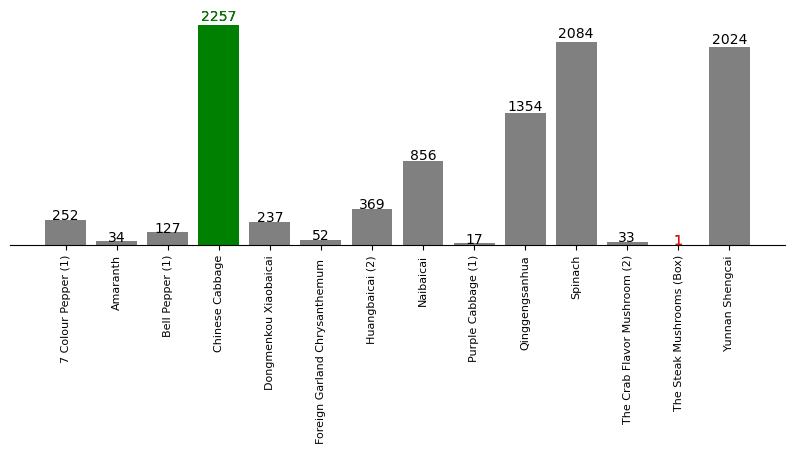

MÊS : Fevereiro


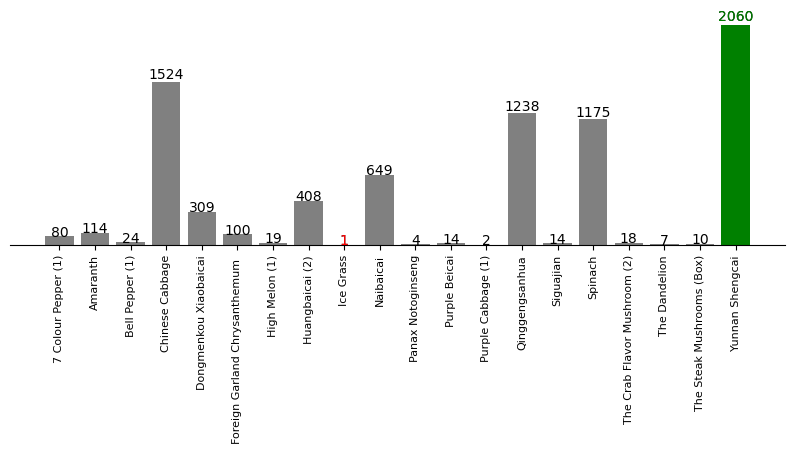

MÊS : Março


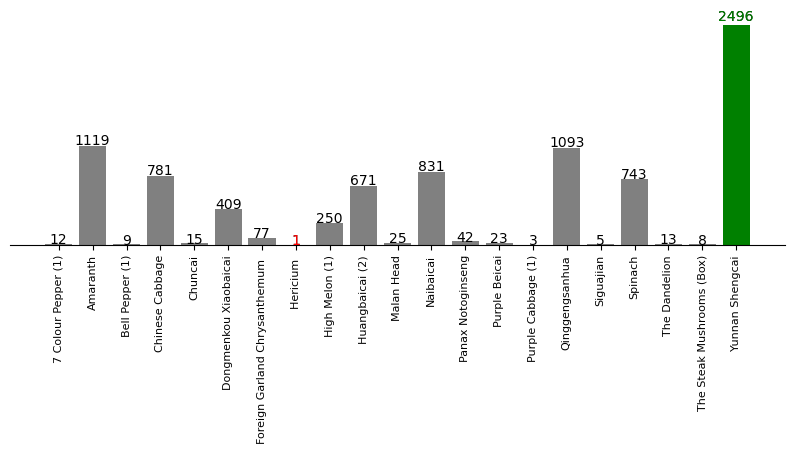

MÊS : Abril


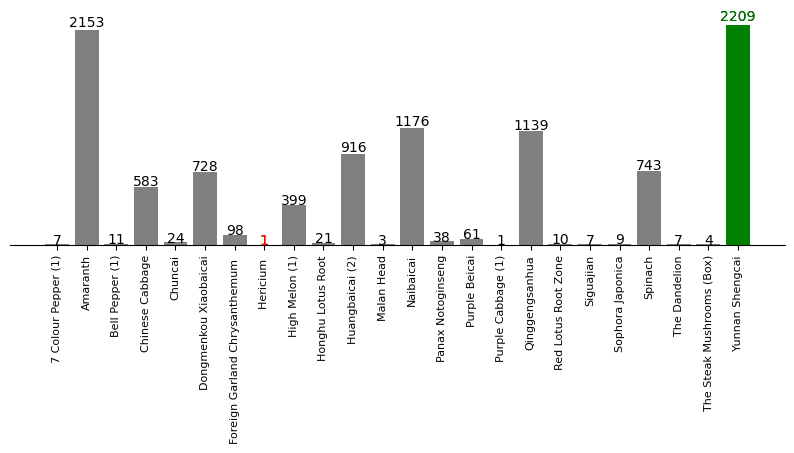

MÊS : Maio


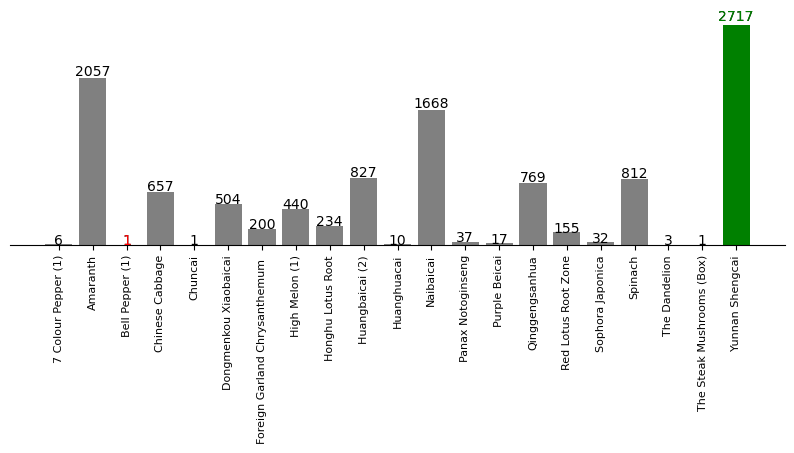

MÊS : Junho


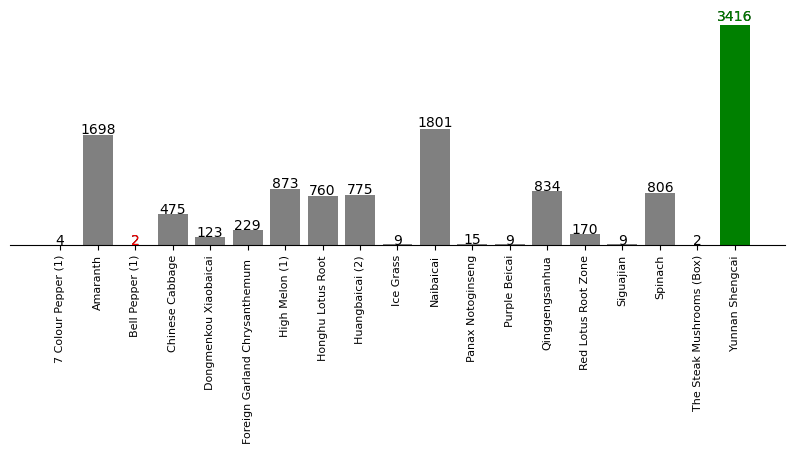

MÊS : Julho


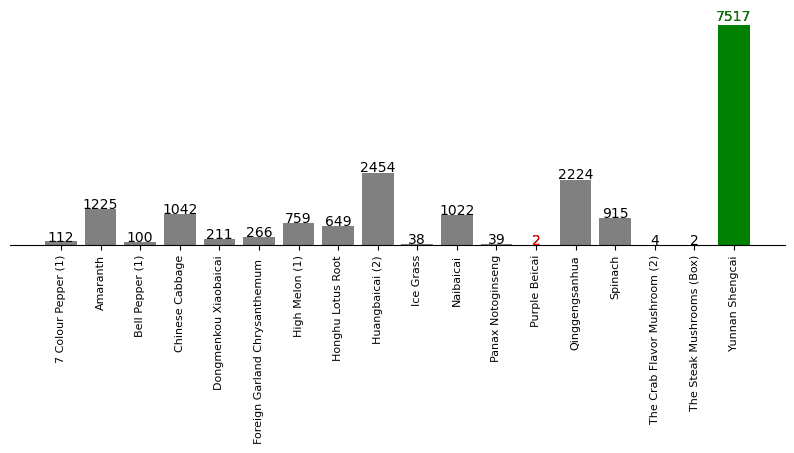

MÊS : Agosto


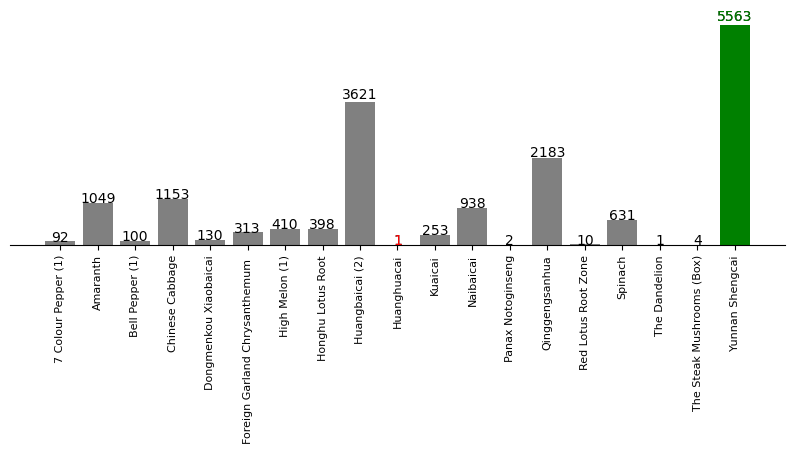

MÊS : Setembro


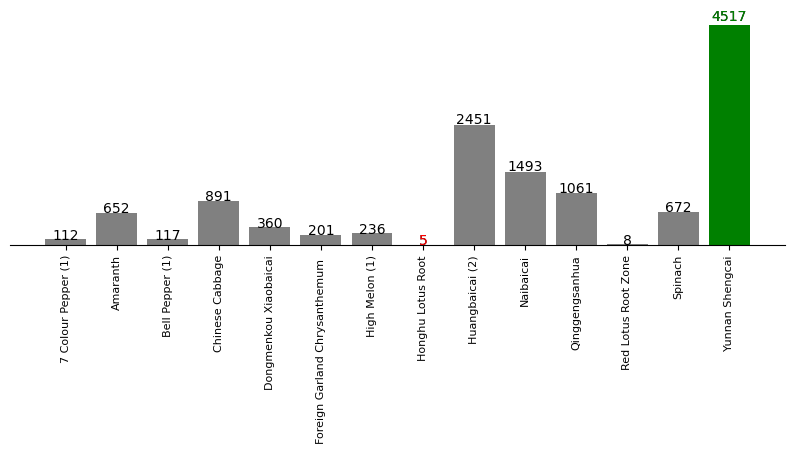

MÊS : Outubro


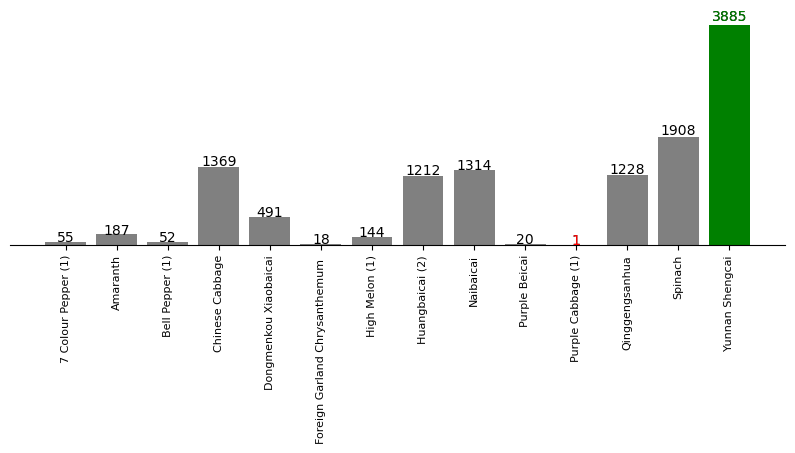

MÊS : Novembro


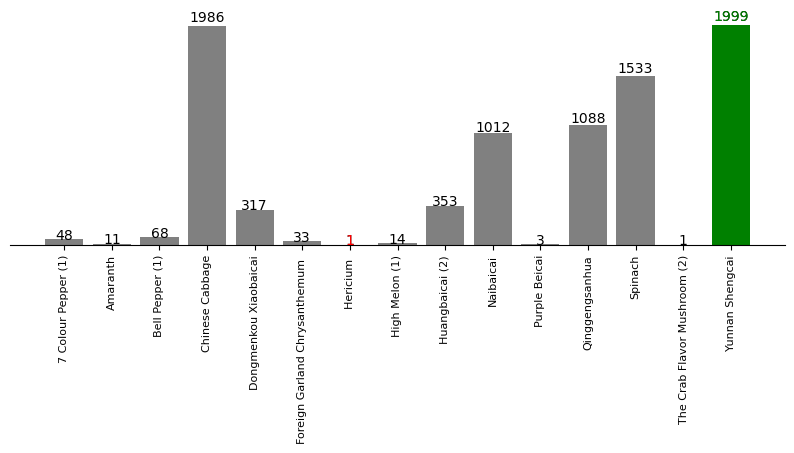

MÊS : Dezembro


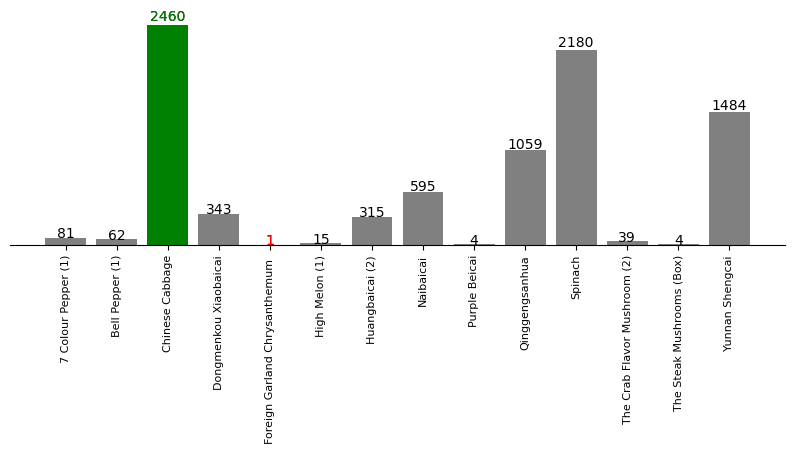

In [137]:
bases_visualizar = [janeiro1, fevereiro1, marco1, abril1, maio1, junho1, julho1, agosto1, setembro1, outubro1, novembro1, dezembro1]
meses_do_ano = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
for num, i in enumerate(bases_visualizar):
    print("MÊS :",meses_do_ano[num])
    grafico_produtos_Perda_15mais_meses(i)

Analisando a base acima, podemos ver algumas informações interessantes, como:

As vendas de Chinese Cabbage entre novembro e fevereiro são bem maiores quando comparadas a outros meses. Com pico em janeiro de 2460, e mínimo de 475 em junho.

**Isso pode ocorrer por diversos fatores, como:**
- Época de colheita 
- Padrões de consumo da população
- Fatores de correlação com outros alimentos
- Poder de compra